<a ><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/Logo_INSA_Lyon_%282014%29.svg/langfr-2560px-Logo_INSA_Lyon_%282014%29.svg.png"  width="200" align="left"> </a>
<div style="text-align: right"> <h3><span style="color:gray"> Projet de recherche </span> </h3> </div>

<br>
<br>
<br>


<h1><center>Data Analysis</center></h1>
<h2><center> <span style="font-weight:normal"><font color='#e42618'> Creating Targets and Features based on analyst reports and market data</font>  </span></center></h2>


<h3><center><font color='gray'>JONAS GOTTAL</font></center></h3>





<h4>Project scope</h4>

- Obtaining financial research containing both a report in natural language and a quantifiable prediction on the underlying asset
- Analyzing the underlying data and building predictive models (Large Language Models (LLMs)) based on natural language 
- Ultimately showing that the analysts prediction can be outperformed by application of LLM's 
<br>

---
---

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="text-decoration:none; margin-top: 30px; background-color:#F2F2F2; border-color:#720006">
    <span style="color:#720006">
    <ol>
        <li><a href="#1"> <span style="color:#720006;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Design of meaningful Targets</span> </a></li>
       <li><a href="#5"> <span style="color:#720006;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Exploratory Analysis: detection of Features</span> </a></li> 
       <ol>
       <li><a href="#6"> <span style="color:#720006;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Visualization of Text</span> </a></li>
       <li><a href="#7"> <span style="color:#720006;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Absence and presence of certain words and styles (Active/Passive)</span> </a></li>
       <li><a href="#8"> <span style="color:#720006;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Correlation of classes</span> </a></li>
       </ol>
       <li><a href="#10"> <span style="color:#720006;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Preliminary Conclusion</span> </a></li>
    </ol>
    </span>
</div>

#### Requirements
- ```Python 3.9.18``` (conda env)
- ```pip freeze > requirements.txt```
- ```conda env export > environment.yml```

# Design of meaningful Targets <a id="1"></a>

### Load Data

In [3]:
import json
import pandas as pd
import numpy as np
# suppress warnings, especially for FutureWarning passing literal json
import warnings
warnings.filterwarnings("ignore")

# get date as datetime
from datetime import datetime

# Load the data from the JSON file
with open('Data/Market Data/30d_data/JSON/all_data.json') as f:
    all_data_30 = json.load(f)

with open('Data/Market Data/30d_data/JSON/all_data.json') as f:
    all_data_60 = json.load(f)

# Convert each item in the dictionary back into a DataFrame
all_data_30_df = {key: pd.read_json(value, orient='columns') for key, value in all_data_30.items()}

all_data_60_df = {key: pd.read_json(value, orient='columns') for key, value in all_data_60.items()}

df = pd.read_csv('Data/final_data.csv', index_col=0);


In [4]:
#test 
all_data_60_df['VMUK.L'].head(2)

,Open,High,Low,Close,Adj Close,Volume
2023-10-23,152.649994,154.699997,151.149994,154.399994,154.399994,1511370
2023-10-24,150.699997,157.050003,149.149994,151.350006,151.350006,2441229


### Get moving average before and after

In [5]:
# for adjusted close in all_data_df[symbol], calculate the moving average from the start to the date (df["PriceDate"][0]) and from that date to the end
# and save in df["30dAvgPrice"][0]

df["30dAvgPriceBefore"] = np.nan
df["30dAvgPriceAfter"] = np.nan
df["60dAvgPriceBefore"] = np.nan
df["60dAvgPriceAfter"] = np.nan

for i in range(len(df)):
    symbol = df["FinalTickerSymbol"][i]
    date = df["PriceDate"][i]
    # turn date into datetime
    date = datetime.strptime(date, '%d/%m/%Y')
    date = date.strftime('%Y-%m-%d')
    try:
        df["30dAvgPriceBefore"][i] = all_data_30_df[symbol]["Adj Close"][:date].mean()
        df["30dAvgPriceAfter"][i] = all_data_30_df[symbol]["Adj Close"][date:].mean()
        df["60dAvgPriceBefore"][i] = all_data_60_df[symbol]["Adj Close"][:date].mean()
        df["60dAvgPriceAfter"][i] = all_data_60_df[symbol]["Adj Close"][date:].mean()
    except:
        pass
    # print progress
    #print(f"{i+1}/{len(df)}")

In [6]:
df.head()

,ParseDate,Title,CompanyName,TickerSymbol,Rating,ReportDate,AuthorName,Price,Currency,PriceDate,...,MarketCap,Exchange,Volume,TickerCurrency,TickerPrice,IsClose,30dAvgPriceBefore,30dAvgPriceAfter,60dAvgPriceBefore,60dAvgPriceAfter
0,24/11/2023,Virgin Money Meeting Short-Term Targets but Me...,Virgin Money UK PLC,VMUK,4,24/11/2023,Nathan Zaia,146.75,GBP,23/11/2023,...,1.932661e+09,LSE,45564.0,GBp,157.000000,True,157.710417,154.075000,157.710417,154.075000
1,24/11/2023,Virgin Money Meeting Short-Term Targets but Me...,Virgin Money UK PLC,VUK,4,24/11/2023,Nathan Zaia,2.78,AUD,24/11/2023,...,3.709752e+09,ASX,2057263.0,AUD,2.960000,True,2.994167,2.940476,2.994167,2.940476
2,24/11/2023,Qube's Good Momentum Likely to Carry Into Fisc...,Qube Holdings Ltd,QUB,4,24/11/2023,Adrian Atkins,2.93,AUD,24/11/2023,...,5.229462e+09,ASX,2520549.0,AUD,2.930000,True,2.840000,3.059524,2.840000,3.059524
3,24/11/2023,Stabilization of Political Risk in Spain Is Po...,Endesa SA,ELE,4,23/11/2023,Tancrede Fulop,18.84,EUR,24/11/2023,...,2.130355e+10,IOB,5925.0,EUR,18.764191,True,18.198966,18.992456,18.198966,18.992456
4,24/11/2023,Sage Has Reached an Inflection Point in Its Cl...,Sage Group (The) PLC,SGE,1,23/11/2023,Rob Hales,1130.50,GBP,23/11/2023,...,1.173311e+10,LSE,262362.0,GBp,1130.000000,True,980.521973,1142.985268,980.521973,1142.985268


In [7]:
# only use data for "isClose" == True
print(len(df))
df = df[df["IsClose"] == True]
# then reset index
df = df.reset_index(drop=True)
print(len(df))

1626
1586


### Stock Trend before and after release of report

We check whether the stock is growing ```(1)```, constant ```(0)``` or falling ```(-1)``` for two points of time: at release of report and 30d/60d after. We also design a binary variable in the same way whether the analyst estimates the stock to grow, fall or move sideways. This enables us to design our desired Targets and also obtain some basic metrics:
- Trend of predictions
- Accuracy of predictions 
- And whether the accuracy is dependent on the prediction itself -> sub categories



In [8]:
#check whether two numbers are nearly the same
def isclose(a, b, rel_tol=3e-02, abs_tol=0.0):
    return abs(a-b) <= max(rel_tol * max(abs(a), abs(b)), abs_tol)

# Thresh
# isclose(1.05, 1.00)

# we loop over i elements in the df and check whether the price is within 5% of the price in the Price column
trend_list = []
value = False
for i in range(len(df)):
    value = isclose(df["30dAvgPriceBefore"][i], df["TickerPrice"][i])
    if value == True:
        trend_list.append(0)
    else:
        if df["TickerPrice"][i] > df["30dAvgPriceBefore"][i]:
            trend_list.append(1)
        else:
            trend_list.append(-1)
    # print progress
   # print(f"{i+1}/{len(df)}")

df["30dTrend"] = trend_list

trend_list = []
value = False
for i in range(len(df)):
    value = isclose(df["60dAvgPriceBefore"][i], df["TickerPrice"][i])
    if value == True:
        trend_list.append(0)
    else:
        if df["TickerPrice"][i] > df["60dAvgPriceBefore"][i]:
            trend_list.append(1)
        else:
            trend_list.append(-1)
    # print progress
   # print(f"{i+1}/{len(df)}")

df["60dTrend"] = trend_list

# we loop over i elements in the df and check whether the price is within 5% of the price in the Price column
trend_list = []
value = False
for i in range(len(df)):
    value = isclose(df["30dAvgPriceAfter"][i], df["TickerPrice"][i])
    if value == True:
        trend_list.append(0)
    else:
        if df["TickerPrice"][i] < df["30dAvgPriceAfter"][i]:
            trend_list.append(1)
        else:
            trend_list.append(-1)
    # print progress
   # print(f"{i+1}/{len(df)}")

df["Actual30d"] = trend_list

trend_list = []
value = False
for i in range(len(df)):
    value = isclose(df["60dAvgPriceAfter"][i], df["TickerPrice"][i])
    if value == True:
        trend_list.append(0)
    else:
        if df["TickerPrice"][i] < df["60dAvgPriceAfter"][i]:
            trend_list.append(1)
        else:
            trend_list.append(-1)
    # print progress
   # print(f"{i+1}/{len(df)}")

df["Actual60d"] = trend_list


#Update the function to include a higher tolerance
#the prediction is for a longer time horizon, so we can be less precise
def isclose(a, b, rel_tol=8e-02, abs_tol=0.0):
    return abs(a-b) <= max(rel_tol * max(abs(a), abs(b)), abs_tol)

# we loop over i elements in the df and check whether the price is within 5% of the price in the Price column
prediction_list = []
value = False
for i in range(len(df)):
    value = isclose(df["FairPrice"][i], df["Price"][i])
    if value == True:
        prediction_list.append(0)
    else:
        if df["FairPrice"][i] > df["Price"][i]:
            prediction_list.append(1)
        else:
            prediction_list.append(-1)
    # print progress
   # print(f"{i+1}/{len(df)}")

df["Prediction"] = prediction_list

In [9]:
# new column for whether the prediction was correct after 30 and 60 days
# is True if the prediction and actual30 are the same
df["30Correct"] = df["Prediction"] == df["Actual30d"]
df["60Correct"] = df["Prediction"] == df["Actual60d"]

# the same if the prediction just mirrors the trend
#is true if the prediction and the trend and the actual are all the same
df["30CorrectTrend"] = (df["Prediction"] == df["30dTrend"]) & (df["Prediction"] == df["Actual30d"])
df["60CorrectTrend"] = (df["Prediction"] == df["60dTrend"]) & (df["Prediction"] == df["Actual60d"])

df["30CorrectNoTrend"] = (df["Prediction"] != df["30dTrend"]) & (df["Prediction"] == df["Actual30d"])
df["60CorrectNoTrend"] = (df["Prediction"] != df["60dTrend"]) & (df["Prediction"] == df["Actual60d"])

# column whether a change is predicted
df["30Change"] = df["Prediction"] != df["30dTrend"]
df["60Change"] = df["Prediction"] != df["60dTrend"]

df["StableTrend"] = df["30dTrend"] == df["60dTrend"]



In [10]:
df.head()

,ParseDate,Title,CompanyName,TickerSymbol,Rating,ReportDate,AuthorName,Price,Currency,PriceDate,...,Prediction,30Correct,60Correct,30CorrectTrend,60CorrectTrend,30CorrectNoTrend,60CorrectNoTrend,30Change,60Change,StableTrend
0,24/11/2023,Virgin Money Meeting Short-Term Targets but Me...,Virgin Money UK PLC,VMUK,4,24/11/2023,Nathan Zaia,146.75,GBP,23/11/2023,...,1,False,False,False,False,False,False,True,True,True
1,24/11/2023,Virgin Money Meeting Short-Term Targets but Me...,Virgin Money UK PLC,VUK,4,24/11/2023,Nathan Zaia,2.78,AUD,24/11/2023,...,1,False,False,False,False,False,False,True,True,True
2,24/11/2023,Qube's Good Momentum Likely to Carry Into Fisc...,Qube Holdings Ltd,QUB,4,24/11/2023,Adrian Atkins,2.93,AUD,24/11/2023,...,1,True,True,True,True,False,False,False,False,True
3,24/11/2023,Stabilization of Political Risk in Spain Is Po...,Endesa SA,ELE,4,23/11/2023,Tancrede Fulop,18.84,EUR,24/11/2023,...,1,False,False,False,False,False,False,False,False,True
4,24/11/2023,Sage Has Reached an Inflection Point in Its Cl...,Sage Group (The) PLC,SGE,1,23/11/2023,Rob Hales,1130.50,GBP,23/11/2023,...,-1,False,False,False,False,False,False,True,True,True


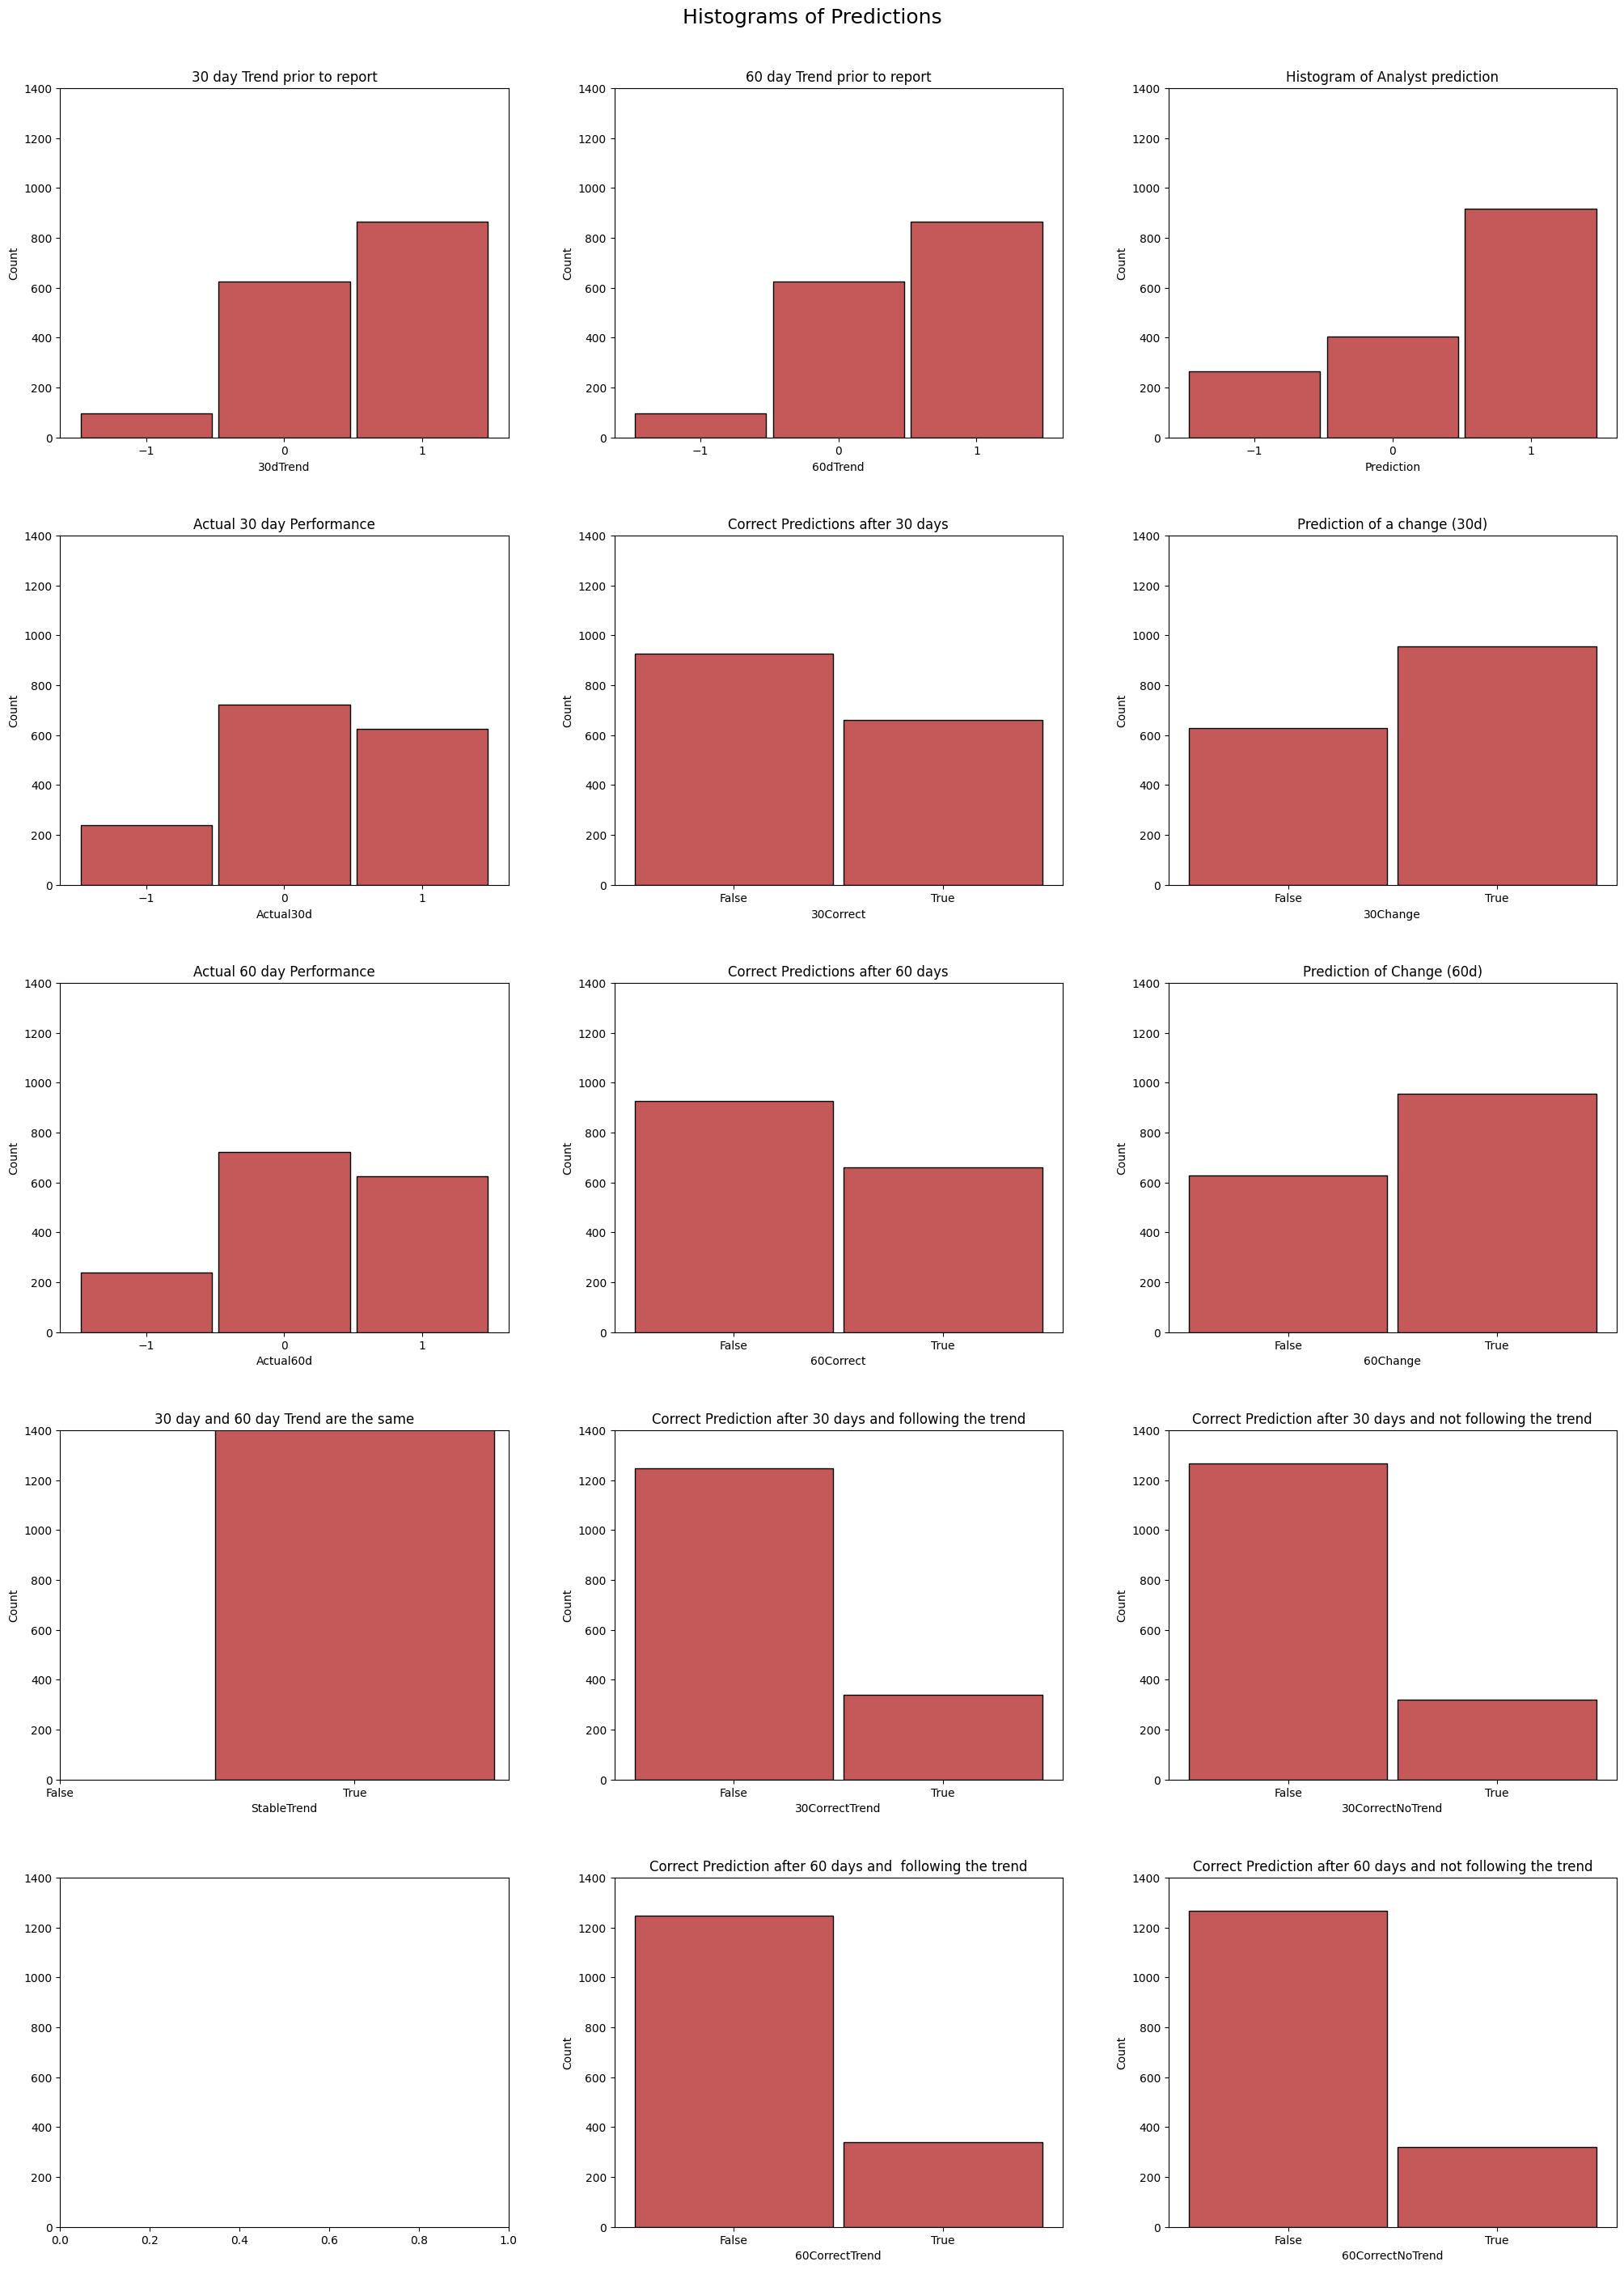

In [11]:
# we visualize the binary data of the columns Trend, Prediction by histograms
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Trend', 'Prediction' are its columns
fig, axs = plt.subplots(5,3, figsize=(21, 29))


sns.histplot(data=df, x='30dTrend', kde=False, ax=axs[0,0], discrete=True, color = "firebrick", shrink=0.95)
axs[0,0].set_title('30 day Trend prior to report')
axs[0,0].set_xticks([-1, 0, 1])

sns.histplot(data=df, x='60dTrend', kde=False, ax=axs[0,1], discrete=True, color = "firebrick", shrink=0.95)
axs[0,1].set_title('60 day Trend prior to report')
axs[0,1].set_xticks([-1, 0, 1])

sns.histplot(data=df, x='Prediction', kde=False, ax=axs[0,2], discrete=True, color = "firebrick", shrink=0.95)
axs[0,2].set_title('Histogram of Analyst prediction')
axs[0,2].set_xticks([-1, 0, 1])


sns.histplot(data=df, x='Actual30d', kde=False, ax=axs[1,0], discrete=True, color = "firebrick", shrink=0.95)
axs[1,0].set_title('Actual 30 day Performance')
axs[1,0].set_xticks([-1, 0, 1])

sns.histplot(data=df, x='30Correct', kde=False, ax=axs[1,1], discrete=True, color = "firebrick", shrink=0.95)
axs[1,1].set_title('Correct Predictions after 30 days')
axs[1,1].set_xticks([False, True])
axs[1,1].set_xticklabels(['False', 'True'])

sns.histplot(data=df, x='30Change', kde=False, ax=axs[1,2], discrete=True, color = "firebrick", shrink=0.95)
axs[1,2].set_title('Prediction of a change (30d)')
axs[1,2].set_xticks([False, True])
axs[1,2].set_xticklabels(['False', 'True'])



sns.histplot(data=df, x='Actual60d', kde=False, ax=axs[2,0], discrete=True, color = "firebrick", shrink=0.95)
axs[2,0].set_title('Actual 60 day Performance')
axs[2,0].set_xticks([-1, 0, 1])

sns.histplot(data=df, x='60Correct', kde=False, ax=axs[2,1], discrete=True, color = "firebrick", shrink=0.95)
axs[2,1].set_title('Correct Predictions after 60 days')
axs[2,1].set_xticks([False, True])
axs[2,1].set_xticklabels(['False', 'True'])


sns.histplot(data=df, x='60Change', kde=False, ax=axs[2,2], discrete=True, color = "firebrick", shrink=0.95)
axs[2,2].set_title('Prediction of Change (60d)')
axs[2,2].set_xticks([False, True])
axs[2,2].set_xticklabels(['False', 'True'])



sns.histplot(data=df, x='StableTrend', kde=False, ax=axs[3,0], discrete=True, color = "firebrick", shrink=0.95)
axs[3,0].set_title('30 day and 60 day Trend are the same')
axs[3,0].set_xticks([False, True])
axs[3,0].set_xticklabels(['False', 'True'])


sns.histplot(data=df, x='30CorrectTrend', kde=False, ax=axs[3,1], discrete=True, color = "firebrick", shrink=0.95)
axs[3,1].set_title('Correct Prediction after 30 days and following the trend')
axs[3,1].set_xticks([False, True])
axs[3,1].set_xticklabels(['False', 'True'])

sns.histplot(data=df, x='30CorrectNoTrend', kde=False, ax=axs[3,2], discrete=True, color = "firebrick", shrink=0.95)
axs[3,2].set_title('Correct Prediction after 30 days and not following the trend')
axs[3,2].set_xticks([False, True])
axs[3,2].set_xticklabels(['False', 'True'])





sns.histplot(data=df, x='60CorrectTrend', kde=False, ax=axs[4,1], discrete=True, color = "firebrick", shrink=0.95)
axs[4,1].set_title('Correct Prediction after 60 days and  following the trend')
axs[4,1].set_xticks([False, True])
axs[4,1].set_xticklabels(['False', 'True'])



sns.histplot(data=df, x='60CorrectNoTrend', kde=False, ax=axs[4,2], discrete=True, color = "firebrick", shrink=0.95)
axs[4,2].set_title('Correct Prediction after 60 days and not following the trend')
axs[4,2].set_xticks([False, True])
axs[4,2].set_xticklabels(['False', 'True'])

# Set the same y-axis limit for all subplots
for row in axs:
    for ax in row:
        ax.set_ylim([0, 1400])  # Change 0 and 1000 to the limits you want

#add title
fig.suptitle('Histograms of Predictions', fontsize=18)
plt.tight_layout(pad=4.0)
#plt.show()
# safe as pdf
plt.savefig('Plots/histograms.pdf')

This shows that the analyst reports have a similar distribution of predictions but they rarely have the right predictions. So we try to improve the accuracy by analysing the text data.

# Exploratory Analysis: detection of Features <a id="5"></a>

We try to find metrics in our text data with correlation with our targets so we can improve our predictive qualities.

## Visualization of Text <a id="6"></a> 
First we try to gain more intuition on the text data through some visualizations.

In [12]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

df = pd.read_csv('Data/final_data.csv', index_col=0)


### Word Cloud

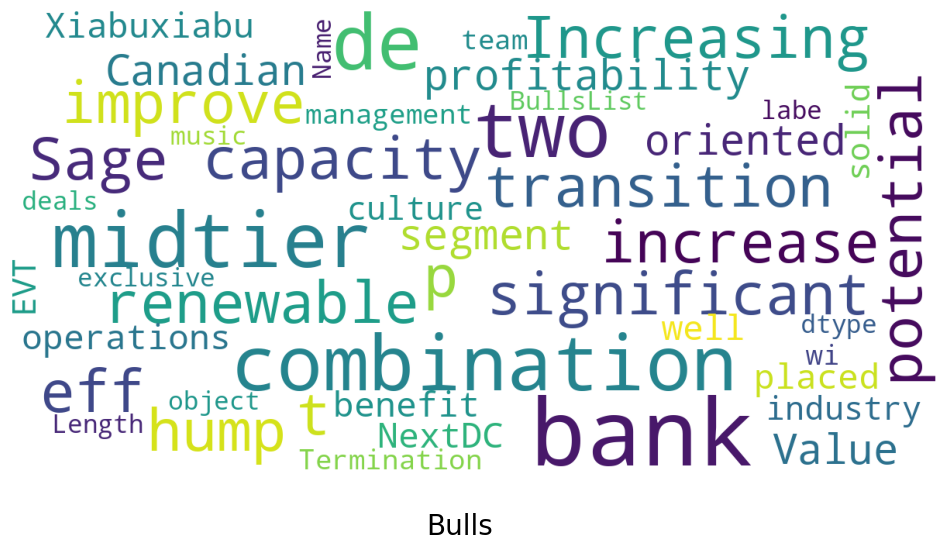

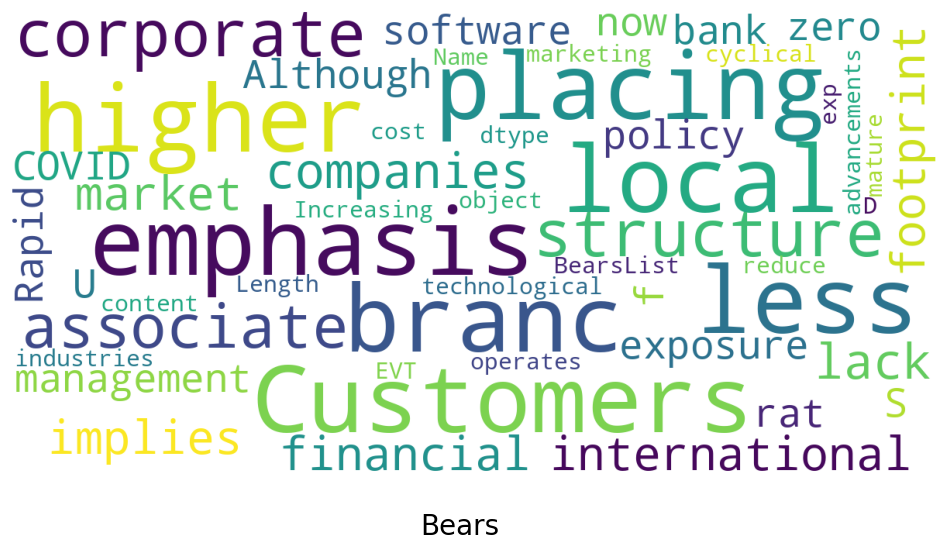

In [16]:

stopwords = set(STOPWORDS)

def show_wordcloud(data, stopwords, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)

    # also save as pdf
    wordcloud =  wordcloud.to_file(f'Plots/{title}_WordCloud.png')
    plt.show()

show_wordcloud(df['BullsList'], stopwords, title = "Bulls")
show_wordcloud(df['BearsList'], stopwords, title = "Bears")

### Word Association for Knowledge Graphs

In [173]:
import nltk
import pandas as pd
import numpy as np
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [174]:
#combine all the text in one column into one string
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [175]:
# from https://github.com/PrashantSaikia/word-association-graph

def word_association_graph(text_input, title, k=0.4, font_size=32):
    '''
    -The input text is a string of sentences ending in periods. If the text does not have any period, it does not produce a plot.
    -The output is a plot of the nouns in the text connected to the adjectives and verbs as they appear in the text.
    -k is the 'spread factor' - lower the k, lesser the intra-cluster spread,and vice versa.
    -The nodes are sized according to their degree.
    -Nodes are colored red if they are nouns, yellow if they are adjectives, and blue if they are verbs.
    '''
    nouns_in_text = []
    is_noun = lambda pos: pos[:2] == 'NN'
    text = combine_text(text_input)

    for sent in text.split('.')[:-1]:   
        tokenized = nltk.word_tokenize(sent)
        nouns=[word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)]
        nouns_in_text.append(' '.join([word for word in nouns if not (word=='' or len(word)==1)]))

    nouns_list = []
    
    for sent in nouns_in_text:
        temp = sent.split(' ')
        for word in temp:
            if word not in nouns_list:
                nouns_list.append(word)

    df = pd.DataFrame(np.zeros(shape=(len(nouns_list),2)), columns=['Nouns', 'Verbs & Adjectives'])
    df['Nouns'] = nouns_list

    is_adjective_or_verb = lambda pos: pos[:2]=='JJ' or pos[:2]=='VB'
    for sent in text.split('.'):
        for noun in nouns_list:
            if noun in sent:
                tokenized = nltk.word_tokenize(sent)
                adjectives_or_verbs = [word for (word, pos) in nltk.pos_tag(tokenized) if is_adjective_or_verb(pos)]
                ind = df[df['Nouns']==noun].index[0]
                df['Verbs & Adjectives'][ind]=adjectives_or_verbs

    G = nx.Graph()
    color_map=[]
    for i in range(len(df)):
        G.add_node(df['Nouns'][i], title=df['Nouns'][i], group=1)
        color_map.append('blue')
        for word in df['Verbs & Adjectives'][i]:
            G.add_edges_from([(df['Nouns'][i], word)])
            
    pos = nx.spring_layout(G, k)
    
    d = nx.degree(G)
    node_sizes = []
    for i in d:
        _, value = i
        node_sizes.append(value)
    
    color_list = []
    for i in G.nodes:
        value = nltk.pos_tag([i])[0][1]
        if (value=='NN' or value=='NNP' or value=='NNS'):
            color_list.append('red')
        elif value=='JJ':
            color_list.append('yellow')
        else:
            color_list.append('blue')
    
    nt = Network('750px', '1400px')
    nt.from_nx(G)
    nt.show_buttons(filter_=['physics'])
    nt.show(f'Plots/{title}.html', notebook=False)
    plt.figure(figsize=(40,40))
    nx.draw(G, pos, node_size=[(v+1)*200 for v in node_sizes], with_labels=True, node_color=color_list, font_size=font_size)
    plt.savefig(f'Plots/{title}.png')

In [ ]:
word_association_graph(df["BearsList"], "Bears")

In [177]:
word_association_graph(df["BullsList"], "Bulls")

/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_72195/2748473044.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Verbs & Adjectives'][ind]=adjectives_or_verbs
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_72195/2748473044.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['midtier', 'deliver', 'operating']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Verbs & Adjectives'][ind]=adjectives_or_verbs


Plots/Bulls.html


## Absence and presence of certain words <a id="7"></a> 

In [136]:
# we first install the library
# pip install spacy
# then we download the english model
# python -m spacy download en_core_web_sm
# we import the library
import spacy
# we load the english model
nlp = spacy.load("en_core_web_sm")

In [137]:
# calculate the number of occurences of negations in the column "BearsList"

# create a list of all the negations
negations = ["not", "no", "n't", "never", "neither", "nor", "none", "nobody", "nothing", "nowhere", "hardly", "scarcely", "barely", "doesn't", "isn't", "wasn't", "shouldn't", "wouldn't", "couldn't", "won't", "can't", "don't", "didn't", "haven't", "hasn't", "hadn't", "aren't", "weren't"]

# create a list of all the negations in the BearsList column
negation_list = []
for i in range(len(df)):
    bear_list = df["BearsList"][i]
    bear_list = bear_list.split()
    item_list = []
    for word in bear_list:
        # make lower case
        word = word.lower()
        if word in negations:
            item_list.append(word)
    #negation_list.append(item_list)
            
    # we calculate the ratio of negations to all words in the list
    negation_list.append(len(item_list)/len(bear_list))
    # print progress
    #print(f"{i+1}/{len(df)}")
#add the list to the dataframe
df["NegationsBear"] = negation_list

# we do the same for the bull list
# create a list of all the negations in the BullsList column
negation_list = []
for i in range(len(df)):
    bull_list = df["BullsList"][i]
    bull_list = bull_list.split()
    item_list = []
    for word in bull_list:
        # make lower case
        word = word.lower()
        if word in negations:
            item_list.append(word)
    negation_list.append(len(item_list)/len(bull_list))
    # print progress
   # print(f"{i+1}/{len(df)}")
#add the list to the dataframe
df["NegationsBull"] = negation_list

# we do the same for comparatives   
# create a list of all the comparatives
comparatives = ["more", "most", "less", "least", "fewer", "fewest"]

# create a list of all the comparatives in the BearsList column
comparative_list = []
for i in range(len(df)):
    bear_list = df["BearsList"][i]
    bear_list = bear_list.split()
    item_list = []
    for word in bear_list:
        # make lower case
        word = word.lower()
        if word in comparatives:
            item_list.append(word)
    comparative_list.append(len(item_list)/len(bear_list))
    # print progress
    #print(f"{i+1}/{len(df)}")
#add the list to the dataframe
df["ComparativesBear"] = comparative_list

# we do the same for the bull list

# create a list of all the comparatives in the BullsList column
comparative_list = []
for i in range(len(df)):
    bull_list = df["BullsList"][i]
    bull_list = bull_list.split()
    item_list = []
    for word in bull_list:
        # make lower case
        word = word.lower()
        if word in comparatives:
            item_list.append(word)
    comparative_list.append(len(item_list)/len(bull_list))
    # print progress
    #print(f"{i+1}/{len(df)}")
#add the list to the dataframe
df["ComparativesBull"] = comparative_list

# we do the same for superlatives
# create a list of all the superlatives
superlatives = ["best", "worst", "biggest", "largest", "smallest", "greatest", "highest", "lowest", "most", "least", "top", "bottom", "first", "last", "leading", "trailing", "highest", "lowest", "most", "least", "top", "bottom", "first", "last", "leading", "trailing", "highest", "lowest", "most", "least", "top", "bottom", "first", "last", "leading", "trailing", "highest", "lowest", "most", "least", "top", "bottom", "first", "last", "leading", "trailing", "highest", "lowest", "most", "least", "top", "bottom", "first", "last", "leading", "trailing"]

# create a list of all the superlatives in the BearsList column
superlative_list = []
for i in range(len(df)):
    bear_list = df["BearsList"][i]
    bear_list = bear_list.split()
    item_list = []
    for word in bear_list:
        # make lower case
        word = word.lower()
        if word in superlatives:
            item_list.append(word)
    superlative_list.append(len(item_list)/len(bear_list))
    # print progress
    #print(f"{i+1}/{len(df)}")
#add the list to the dataframe
df["SuperlativesBear"] = superlative_list

# we do the same for the bull list

# create a list of all the superlatives in the BullsList column
superlative_list = []
for i in range(len(df)):
    bull_list = df["BullsList"][i]
    bull_list = bull_list.split()
    item_list = []
    for word in bull_list:
        # make lower case
        word = word.lower()
        if word in superlatives:
            item_list.append(word)
    superlative_list.append(len(item_list)/len(bull_list))
    # print progress
   # print(f"{i+1}/{len(df)}")
#add the list to the dataframe
df["SuperlativesBull"] = superlative_list


# we create a list of buzzwords for financial reports
buzzwords = ['day', 'margins', 'revenue', 'equity', 'margin', 'quarterly', 'year', 'yearly', 'debt', 'flow', 'cost', 'profit', 'expense', 'month', 'weekly', 'taxes', 'daily', 'earnings', 'week', 'income', 'cash', 'liabilities', 'annual', 'quarter', 'monthly', 'assets', 'costs', 'valuations', 'annually', 'expenses', 'tax', 'loss', 'valuation']

# create a list of all the buzzwords in the BearsList column
buzzword_list = []
for i in range(len(df)):
    bear_list = df["BearsList"][i]
    bear_list = bear_list.split()
    item_list = []
    for word in bear_list:
        # make lower case
        word = word.lower()
        if word in buzzwords:
            item_list.append(word)
    buzzword_list.append(len(item_list)/len(bear_list))
    # print progress
   # print(f"{i+1}/{len(df)}")
#add the list to the dataframe
df["BuzzwordsBear"] = buzzword_list

# we do the same for the bull list

# create a list of all the buzzwords in the BullsList column
buzzword_list = []
for i in range(len(df)):
    bull_list = df["BullsList"][i]
    bull_list = bull_list.split()
    item_list = []
    for word in bull_list:
        # make lower case
        word = word.lower()
        if word in buzzwords:
            item_list.append(word)
    buzzword_list.append(len(item_list)/len(bull_list))
    # print progress
    #print(f"{i+1}/{len(df)}")
#add the list to the dataframe
df["BuzzwordsBull"] = buzzword_list

# we create a list of first person pronouns
pronouns = ['i', 'me', 'my', 'mine', 'we', 'us', 'our', 'ours']

# create a list of all the pronouns in the BearsList column
pronoun_list = []
for i in range(len(df)):
    bear_list = df["BearsList"][i]
    bear_list = bear_list.split()
    item_list = []
    for word in bear_list:
        # make lower case
        word = word.lower()
        if word in pronouns:
            item_list.append(word)
    pronoun_list.append(len(item_list)/len(bear_list))
    # print progress
    #print(f"{i+1}/{len(df)}")
#add the list to the dataframe
df["PronounsBear"] = pronoun_list

# we do the same for the bull list

# create a list of all the pronouns in the BullsList column
pronoun_list = []
for i in range(len(df)):
    bull_list = df["BullsList"][i]
    bull_list = bull_list.split()
    item_list = []
    for word in bull_list:
        # make lower case
        word = word.lower()
        if word in pronouns:
            item_list.append(word)
    pronoun_list.append(len(item_list)/len(bull_list))
    # print progress
    #print(f"{i+1}/{len(df)}")
#add the list to the dataframe
df["PronounsBull"] = pronoun_list

# we use spacy to determine whether a sentence is in active voice
def is_active(sentence):
    doc = nlp(sentence)
    passive_rule = [tok.dep_ == "auxpass" for tok in doc]

    return not any(passive_rule)


# we create a list of all the sentences in the BearsList column
active_list = []
for i in range(len(df)):
    bear_list = df["BearsList"][i]
    bear_list = bear_list.split(".")
    item_list = []
    for sentence in bear_list:
       
        if is_active(sentence) == True:
            item_list.append(True)
        else:
            item_list.append(False)
    

    active_list.append((item_list.count(True))/len(bear_list))
    # print progress
    #print(f"{i+1}/{len(df)}")
#add the list to the dataframe
df["ActiveBear"] = active_list

# we do the same for the bull list

# we create a list of all the sentences in the BullsList column
active_list = []
for i in range(len(df)):
    bull_list = df["BullsList"][i]
    bull_list = bull_list.split(".")
    item_list = []
    for sentence in bull_list:
       
        if is_active(sentence) == True:
            item_list.append(True)
        else:
            item_list.append(False)
        
    active_list.append((item_list.count(True))/len(bull_list))
    # print progress
    #print(f"{i+1}/{len(df)}")
#add the list to the dataframe
df["ActiveBull"] = active_list


1/1586
2/1586
3/1586
4/1586
5/1586
6/1586
7/1586
8/1586
9/1586
10/1586
11/1586
12/1586
13/1586
14/1586
15/1586
16/1586
17/1586
18/1586
19/1586
20/1586
21/1586
22/1586
23/1586
24/1586
25/1586
26/1586
27/1586
28/1586
29/1586
30/1586
31/1586
32/1586
33/1586
34/1586
35/1586
36/1586
37/1586
38/1586
39/1586
40/1586
41/1586
42/1586
43/1586
44/1586
45/1586
46/1586
47/1586
48/1586
49/1586
50/1586
51/1586
52/1586
53/1586
54/1586
55/1586
56/1586
57/1586
58/1586
59/1586
60/1586
61/1586
62/1586
63/1586
64/1586
65/1586
66/1586
67/1586
68/1586
69/1586
70/1586
71/1586
72/1586
73/1586
74/1586
75/1586
76/1586
77/1586
78/1586
79/1586
80/1586
81/1586
82/1586
83/1586
84/1586
85/1586
86/1586
87/1586
88/1586
89/1586
90/1586
91/1586
92/1586
93/1586
94/1586
95/1586
96/1586
97/1586
98/1586
99/1586
100/1586
101/1586
102/1586
103/1586
104/1586
105/1586
106/1586
107/1586
108/1586
109/1586
110/1586
111/1586
112/1586
113/1586
114/1586
115/1586
116/1586
117/1586
118/1586
119/1586
120/1586
121/1586
122/1586
123/1586
1

In [140]:
df.head()

,ParseDate,Title,CompanyName,TickerSymbol,Rating,ReportDate,AuthorName,Price,Currency,PriceDate,...,ComparativesBear,ComparativesBull,SuperlativesBear,SuperlativesBull,BuzzwordsBear,BuzzwordsBull,PronounsBear,PronounsBull,ActiveBear,ActiveBull
0,24/11/2023,Virgin Money Meeting Short-Term Targets but Me...,Virgin Money UK PLC,VMUK,4,24/11/2023,Nathan Zaia,146.75,GBP,23/11/2023,...,0.045455,0.000000,0.000000,0.000000,0.015152,0.031746,0.000000,0.0,0.750000,0.75
1,24/11/2023,Virgin Money Meeting Short-Term Targets but Me...,Virgin Money UK PLC,VUK,4,24/11/2023,Nathan Zaia,2.78,AUD,24/11/2023,...,0.045455,0.000000,0.000000,0.000000,0.015152,0.031746,0.000000,0.0,0.750000,0.75
2,24/11/2023,Qube's Good Momentum Likely to Carry Into Fisc...,Qube Holdings Ltd,QUB,4,24/11/2023,Adrian Atkins,2.93,AUD,24/11/2023,...,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.0,0.833333,1.00
3,24/11/2023,Stabilization of Political Risk in Spain Is Po...,Endesa SA,ELE,4,23/11/2023,Tancrede Fulop,18.84,EUR,24/11/2023,...,0.014925,0.021277,0.014925,0.000000,0.014925,0.000000,0.000000,0.0,1.000000,0.80
4,24/11/2023,Sage Has Reached an Inflection Point in Its Cl...,Sage Group (The) PLC,SGE,1,23/11/2023,Rob Hales,1130.50,GBP,23/11/2023,...,0.000000,0.000000,0.000000,0.000000,0.027027,0.013333,0.000000,0.0,0.750000,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,25/11/2023,Minimal Changes To Our Fair Value After Fiscal...,The Toronto-Dominion Bank,TD,4,NaN,Eric Compton,83.15,CAD,23/11/2023,...,0.023256,0.013889,0.000000,0.013889,0.011628,0.027778,0.000000,0.0,0.875000,1.00
1582,25/11/2023,Xiabuxiabu's Value-Oriented Model Should Fare ...,Xiabuxiabu Catering Management (China) Hldgs C...,00520,4,28/08/2023,Ivan Su,3.25,HKD,24/11/2023,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.00
1583,25/11/2023,NextDC's Australia Wide Data Center Network Ex...,Nextdc Ltd,NXT,3,28/08/2023,Dan Baker,12.92,AUD,24/11/2023,...,0.000000,0.022989,0.000000,0.034483,0.016129,0.000000,0.000000,0.0,1.000000,0.75
1584,25/11/2023,EVT on Track To Return to Prepandemic Earnings,EVT Ltd,EVT,4,28/08/2023,Brian Han,10.82,AUD,24/11/2023,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.025316,0.019231,0.0,0.750000,1.00


## Correlation of classes <a id="8"></a> 

Also include the other columns for predictions and correlations: 
- Correlation: Rating vs Prediction vs Uncertainty vs EconomicMoat
- Accuracy: only 4 star etc

/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_72195/1871583711.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["30Correct"] = df_subset["30Correct"].astype(int)
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_72195/1871583711.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["60Correct"] = df_subset["60Correct"].astype(int)
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_72195/1871583711.py:8: SettingWithCopyWarning: 
A value is trying to be set o

<Axes: >

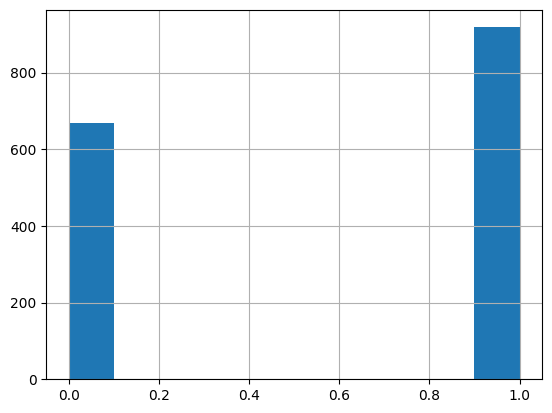

In [144]:
# extract a subset of the dataframe with columns "Rating", "Uncertainty" and "EconomicMoat", 30dTrend	60dTrend	Actual30d	Actual60d	30Correct	60Correct		 
df_subset = df[["Rating", "Uncertainty", "EconomicMoat", "Prediction", "Actual30d", "Actual60d", "30Correct", "60Correct",  "NegationsBear", "NegationsBull", "ComparativesBear", "ComparativesBull", "SuperlativesBear", "SuperlativesBull", "BuzzwordsBear", "BuzzwordsBull", "PronounsBear", "PronounsBull", "ActiveBear", "ActiveBull"]]
# Turn False in 0 and True in 1 for 30Correct	60Correct
df_subset["30Correct"] = df_subset["30Correct"].astype(int)
df_subset["60Correct"] = df_subset["60Correct"].astype(int)

# every row with a Prediction of -1 is turned into 0
df_subset["Prediction"] = df_subset["Prediction"].replace(-1, 0)
# plot the histogram of Prediction
df_subset["Prediction"].hist()

In [145]:
# turn the categorial columns into numerical variables
df_subset["Uncertainty"] = df_subset["Uncertainty"].replace("Low", 1).replace("Medium", 2).replace("High", 3).replace("Very High", 4)
df_subset["EconomicMoat"] = df_subset["EconomicMoat"].replace("Narrow", 1).replace("Wide", 2).fillna(0)
# replace Nan in EconomicMoat with 0


/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_72195/234386782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["Uncertainty"] = df_subset["Uncertainty"].replace("Low", 1).replace("Medium", 2).replace("High", 3).replace("Very High", 4)
/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/ipykernel_72195/234386782.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["EconomicMoat"] = df_subset["EconomicMoat"].replace("Narrow", 1).replace("Wide", 2).fillna(0)


In [146]:
df_subset.head()

,Rating,Uncertainty,EconomicMoat,Prediction,Actual30d,Actual60d,30Correct,60Correct,NegationsBear,NegationsBull,ComparativesBear,ComparativesBull,SuperlativesBear,SuperlativesBull,BuzzwordsBear,BuzzwordsBull,PronounsBear,PronounsBull,ActiveBear,ActiveBull
0,4,3,0.0,1,0,0,0,0,0.000000,0.0,0.045455,0.000000,0.000000,0.000000,0.015152,0.031746,0.000000,0.0,0.750000,0.75
1,4,3,0.0,1,0,0,0,0,0.000000,0.0,0.045455,0.000000,0.000000,0.000000,0.015152,0.031746,0.000000,0.0,0.750000,0.75
2,4,2,1.0,1,1,1,1,1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.0,0.833333,1.00
3,4,2,0.0,1,0,0,0,0,0.014925,0.0,0.014925,0.021277,0.014925,0.000000,0.014925,0.000000,0.000000,0.0,1.000000,0.80
4,1,2,1.0,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.027027,0.013333,0.000000,0.0,0.750000,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,4,1,2.0,1,0,0,0,0,0.000000,0.0,0.023256,0.013889,0.000000,0.013889,0.011628,0.027778,0.000000,0.0,0.875000,1.00
1582,4,3,0.0,1,-1,-1,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.00
1583,3,2,0.0,0,0,0,1,1,0.000000,0.0,0.000000,0.022989,0.000000,0.034483,0.016129,0.000000,0.000000,0.0,1.000000,0.75
1584,4,3,0.0,1,1,1,1,1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.025316,0.019231,0.0,0.750000,1.00


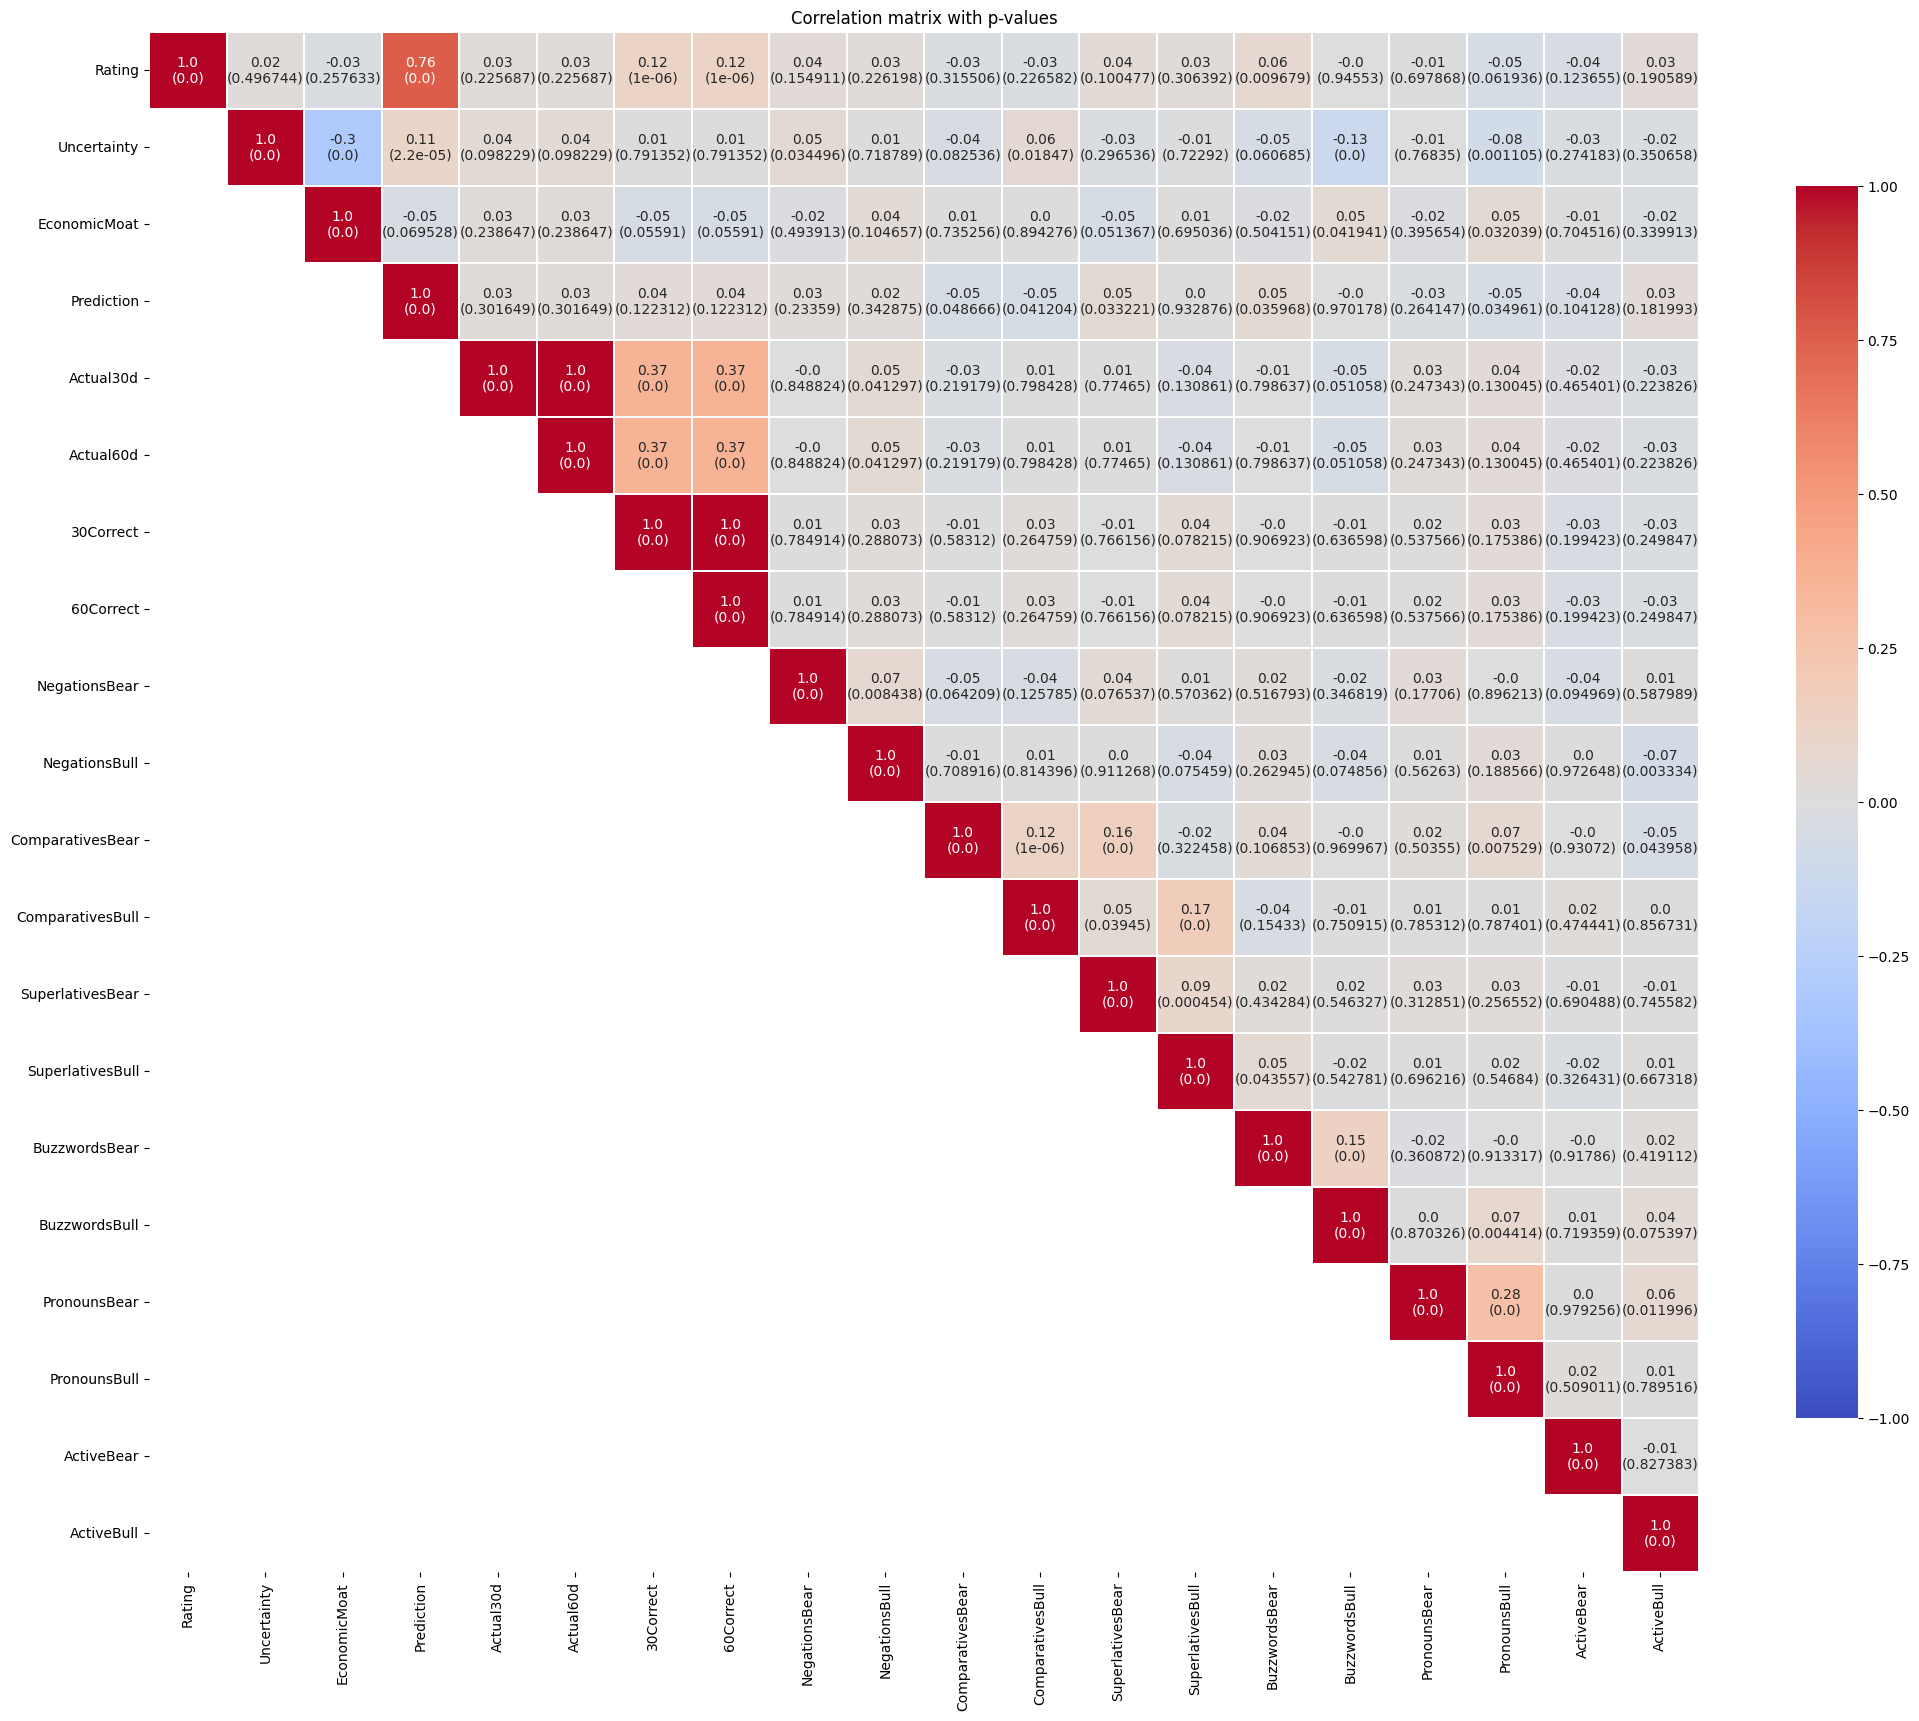

In [148]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assuming df_subset is your DataFrame with numerical data
pvals = df_subset.apply(lambda x: pd.Series([pearsonr(x, df_subset[col])[1] for col in df_subset.columns]), axis=0)
corrs = df_subset.corr()

# Create a new DataFrame that combines the correlation coefficients and the p-values

labels = corrs.round(2).astype(str).reset_index(drop=True)
pval = pvals.round(6).astype(str).reset_index(drop=True)

# for all columns in A we add the corresponding column in B

for column in labels.columns:
    labels[column] = labels[column] + "\n(" + pval[column] + ")"

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corrs, dtype=bool))

# set up plt figure
f, ax = plt.subplots(figsize=(25, 20))

# Add the mask to the heatmap
sns.heatmap(corrs, cmap='coolwarm', annot=labels, mask= (~mask), fmt='', 
            cbar_kws={"shrink": .8}, vmin=-1, vmax=1, 
            linewidths=0.1, linecolor='white')

plt.title('Correlation matrix with p-values')
plt.savefig('Plots/correlation_matrix.png')

So only uncertainty and economic moat have a slight correlation and Rating and Prediction have naturally a strong correlation. Let's see wether the highest rated reports have a better predictive quality.

In [161]:
# subset of df where rating is higher 3
df_subset_high = df[df["Rating"] >= 4]


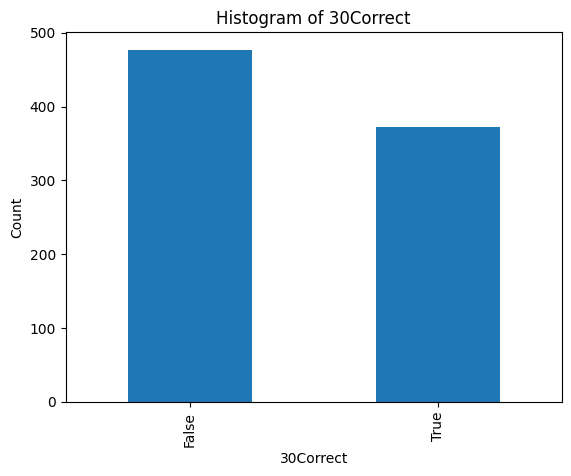

In [162]:
import matplotlib.pyplot as plt

# Count the occurrences of True and False
counts = df_subset_high['30Correct'].value_counts()

# Create a bar plot
counts.plot(kind='bar')

plt.xlabel('30Correct')
plt.ylabel('Count')
plt.title('Histogram of 30Correct')
plt.show()

Unfortunately the accuracy could not be improved, as the rating translates in the prediction.

# Preliminary Conclusion <a id="10"></a>

The Visualization of the Text can provide interesting insights and show the word and association clusters. While the Basic text metrics didn't provide any clear insights, we could show a strong correlation between the rating and the predicted trend. Also the economic moat and the uncertainty have a slight inverse correlation, which seems very intuitive.